In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [3]:
# 데이터 로드
df = pd.read_csv("C:/AI/DL/abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [4]:
# 결측치 확인 및 제거
df = df.dropna()

In [6]:
# 성별 인코딩
label = LabelEncoder()
df['Sex'] = label.fit_transform(df['Sex'])
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [11]:
# 레이블 설정
y = df['Rings'].values  
X = df.drop('Rings', axis=1)

In [12]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape,

((3132, 8), (3132,), (1045, 8), (1045,))

In [13]:
# 데이터 스케일링
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [14]:
# 입력 데이터 형태 변환
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [15]:
# CNN 모델
model = keras.models.Sequential()
model.add(keras.layers.Conv1D(32, kernel_size=2, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(keras.layers.MaxPooling1D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(1))

# 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

C:\Users\tpfzl\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [16]:
# 모델 훈련
model_history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 75.7359 - mae: 7.8409 - val_loss: 14.8461 - val_mae: 2.9443
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13.0409 - mae: 2.6634 - val_loss: 8.7495 - val_mae: 2.1552
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 9.9451 - mae: 2.1617 - val_loss: 6.9376 - val_mae: 1.9373
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.7973 - mae: 1.9557 - val_loss: 6.2317 - val_mae: 1.7892
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.2757 - mae: 1.8922 - val_loss: 6.0678 - val_mae: 1.7951
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7600 - mae: 1.8003 - val_loss: 5.9898 - val_mae: 1.7362
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.2831 - mae: 1.7959 - val_loss: 5.9529 - val_mae: 1.7110
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.7268 - mae: 1.8260 - val_loss: 5.8469 - val_mae: 1.7703
Epoch 9/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.3092 - ma

In [17]:
# 예측
y_pred = model.predict(X_test)

# 성능 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error: 5.3235
Mean Absolute Error: 1.5975


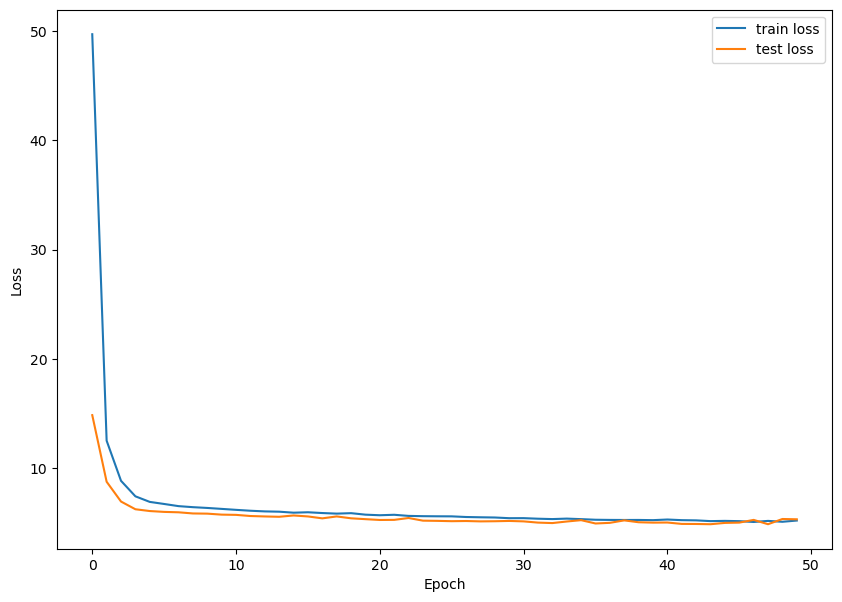

In [21]:

# loss 체크
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(50), model_history.history['loss'], label='train loss')
plt.plot(range(50), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [22]:
model.evaluate(X_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.0796 - mae: 1.5831 


[5.312492370605469, 1.5974905490875244]